In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [2]:
data = np.loadtxt('AbsoprtionData.txt')

In [3]:
np.sum(data)

105480.0

Centroid at number 816

In [4]:
data[816]

219.0

In [5]:
peakdata = data[816-50:816+50]

In [6]:
domain = np.arange(816-50,816+50,1)

In [27]:
xpoints = domain
ypoints = peakdata

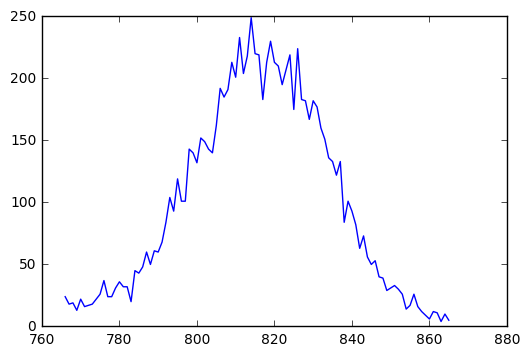

In [28]:
plt.plot(domain,peakdata);

In [31]:
mu = 816
sigma = np.sqrt(816)

In [55]:
sigma = 15

In [79]:
def myfun(n,a,b,c,sigma,mu):
    ans = a*np.exp(-((n - mu)**2)/(2*sigma**2)) + b*n + c  # this is y, "the function to be fit"
    return ans

In [91]:
p0 = [100,0,50,15,816]

In [92]:
xlots = np.linspace(816-60,816+60)  # need lots of data points for smooth curve
yfit = np.zeros((len(xpoints),xlots.size))

plsq, pcov = curve_fit(myfun, xpoints, ypoints, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
b = plsq[1]
eb = np.sqrt(pcov[1,1])
c = plsq[2]
ec = np.sqrt(pcov[2,2])

o = plsq[3]
eo = np.sqrt([pcov[3,3]])

mu = plsq[4]
emu = np.sqrt([pcov[4,4]])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2],plsq[3],plsq[4])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

print('sigma = %.7f +/- %.7f' % (plsq[3], np.sqrt(pcov[3,3])))

print('mu = %.7f +/- %.7f' % (plsq[4], np.sqrt(pcov[4,4])))

a = 215.4465001 +/- 3.3538218
b = -0.1608145 +/- 0.0497039
c = 138.2759703 +/- 40.2046051
sigma = 16.8308388 +/- 0.3847638
mu = 817.3637417 +/- 0.2878310


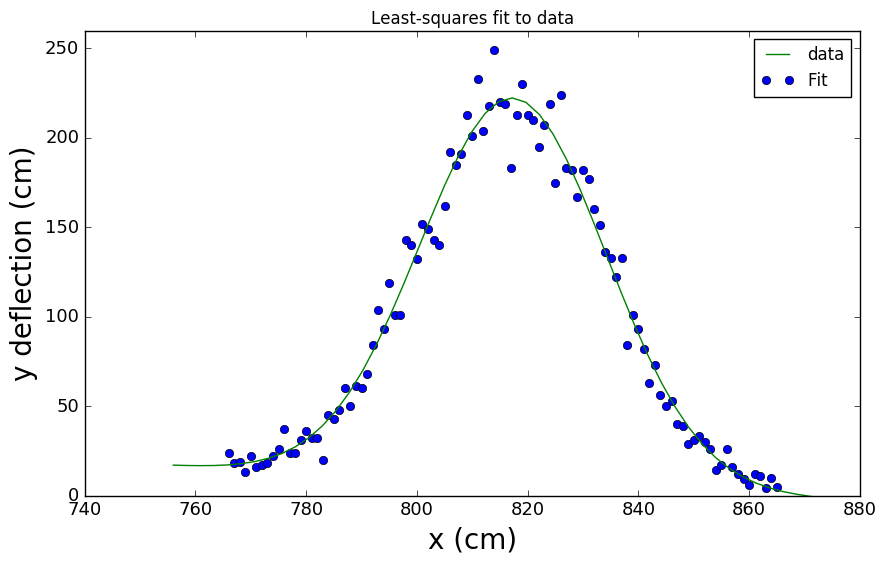

In [93]:
plt.figure(figsize=(10,6));
plt.errorbar(xpoints,ypoints,linestyle = '',marker = 'o');


plt.plot(xlots,yfit);
plt.ylim(0,260)
plt.title('Least-squares fit to data');
plt.legend(['data','Fit'],loc='best');
plt.xlabel('x (cm)',fontsize=20);
plt.ylabel('y deflection (cm)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);

In [94]:
data[816]

219.0

In [95]:
myfun(816,a,b,c,sigma,mu)

221.60927861931862

In [87]:
b

-0.16081447661375123

In [88]:
c

138.27596656045941

In [89]:
mu

817.36374167622239